In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# # Import PyDrive and associated libraries.
# # This only needs to be done once in a notebook.
# from pydrive.auth import GoogleAuth
# from pydrive.drive import GoogleDrive
# from google.colab import auth
# from oauth2client.client import GoogleCredentials

# # Authenticate and create the PyDrive client.
# # This only needs to be done once in a notebook.
# auth.authenticate_user()
# gauth = GoogleAuth()
# gauth.credentials = GoogleCredentials.get_application_default()
# drive = GoogleDrive(gauth)





In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
df = pd.read_csv("/content/drive/MyDrive/Coffee_Stores_Data.csv")

In [5]:
df.head()

,StoreID,BusinessDate,PLU,Description,ItemType,CategoryLvl1Desc,CategoryLvl2Desc,CategoryLvl3Desc,ReceivedQuantity,SoldQuantity,EndQuantity,LatestOrder,StockedOut,GroupID,MissedSales
0,2,2019-06-29,3000227,Caprese Sandwich,Unassigned,Food,Cold Case,Ready to Eat,0.0,3.0,0.0,21,0,2.0,0.000000
1,2,2019-06-29,830620,Honey Raisin Bran Muffin,Core,Food,Bake Case,Muffins & Scones,4.0,2.0,0.0,10,0,2.0,0.000000
2,2,2019-06-29,6228,Pressed Juicery Spicy Greens w Ginger,Unassigned,Food,Cold Case,Ready to Drink,0.0,1.0,9.0,13,0,2.0,0.000000
3,2,2019-06-29,12216,Vive Juice Shot,Unassigned,Food,Cold Case,Ready to Drink,0.0,0.0,27.0,0,0,2.0,0.000000
4,2,2019-06-29,3000277,Mixed Berries & Granola Yogurt Parfait,Unassigned,Food,Cold Case,Ready to Eat,0.0,3.0,0.0,11,1,2.0,0.578969


In [6]:
df.shape

(1259776, 15)

In [7]:
df['StoreID'].unique()

array([  2,   6,  10,  17,  18,  20,  21,  22,  29,  30,  32,  34,  36,
        40,  41,  43,  48,  55,  57,  59,  60,  61,  62,  64,  65,  72,
        73,  76,  77,  81,  82,  83,  85,  86,  93,  94,  95,  97, 101,
       102, 103, 112, 115, 116, 117, 119, 120, 122, 123, 124, 127, 128,
       131, 132, 134, 135, 136, 137, 138, 141, 144, 151, 164, 166, 167,
       169, 171, 173, 176, 177, 178, 179, 181, 183, 184, 186, 189, 190,
       191, 192, 193, 200, 201, 202, 206, 211, 216, 218, 222, 235, 243,
       244, 248, 309, 310, 313, 314, 315, 317, 319, 328, 329, 331, 332,
       334, 335, 336, 341, 344, 346, 348, 350, 356, 359, 363, 365, 367,
       374, 375, 376, 377, 378, 379, 381, 383, 385, 391, 392, 393, 397,
       400, 401])

In [8]:
len(df['StoreID'].unique())

132

In [9]:
df['PLU'].unique()

array([3000227,  830620,    6228,   12216, 3000277, 3000278,  851004,
        820602,  810407,  820801,  820902,  820224,  810703, 3000210,
       3000166, 3000096,  820221, 3000159, 3000162, 3000181, 3000207,
       3000209, 3000211, 3000212, 3000214, 3000024,  841402, 3000281,
       3000297, 3000296, 3000293])

In [10]:
df['BusinessDate'].min()

'2019-06-29'

In [11]:
df['BusinessDate'].max()

'2020-06-29'

In [12]:
df['ItemType'].unique()

array(['Unassigned', 'Core', 'Seasonal'], dtype=object)

In [13]:
df['CategoryLvl1Desc'].unique()

array(['Food'], dtype=object)

In [14]:
df['CategoryLvl2Desc'].unique()

array(['Cold Case', 'Bake Case'], dtype=object)

In [15]:
df['CategoryLvl3Desc'].unique()

array(['Ready to Eat', 'Muffins & Scones', 'Ready to Drink', 'Bagels',
       'Pastries', 'Cookies & Bars', 'Cakes & Breads'], dtype=object)

In [16]:
df_static = df[['PLU','Description','ItemType','CategoryLvl1Desc','CategoryLvl2Desc','CategoryLvl3Desc']].drop_duplicates()

In [17]:
df_static.head()

,PLU,Description,ItemType,CategoryLvl1Desc,CategoryLvl2Desc,CategoryLvl3Desc
0,3000227,Caprese Sandwich,Unassigned,Food,Cold Case,Ready to Eat
1,830620,Honey Raisin Bran Muffin,Core,Food,Bake Case,Muffins & Scones
2,6228,Pressed Juicery Spicy Greens w Ginger,Unassigned,Food,Cold Case,Ready to Drink
3,12216,Vive Juice Shot,Unassigned,Food,Cold Case,Ready to Drink
4,3000277,Mixed Berries & Granola Yogurt Parfait,Unassigned,Food,Cold Case,Ready to Eat


In [18]:
df_dynamic = df.drop(['Description','ItemType','CategoryLvl1Desc','CategoryLvl2Desc','CategoryLvl3Desc','GroupID'],axis=1)
df_dynamic['BusinessDate'] = df_dynamic['BusinessDate'].apply(lambda x:int("".join(x.split("-")[0:2])))

In [19]:
df_dynamic.head()

,StoreID,BusinessDate,PLU,ReceivedQuantity,SoldQuantity,EndQuantity,LatestOrder,StockedOut,MissedSales
0,2,201906,3000227,0.0,3.0,0.0,21,0,0.000000
1,2,201906,830620,4.0,2.0,0.0,10,0,0.000000
2,2,201906,6228,0.0,1.0,9.0,13,0,0.000000
3,2,201906,12216,0.0,0.0,27.0,0,0,0.000000
4,2,201906,3000277,0.0,3.0,0.0,11,1,0.578969


In [20]:
#Top Sales Stores
df_store_SQ = pd.DataFrame(df_dynamic.groupby(['StoreID'])['SoldQuantity'].sum()).sort_values(by=['SoldQuantity'],ascending=False)

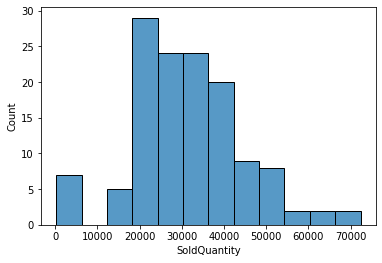

In [21]:
sns.histplot(df_store_SQ.SoldQuantity)

In [22]:
#Top Sales inv
df_inv_SQ = pd.DataFrame(df_dynamic.groupby(['PLU'])['SoldQuantity'].sum()).sort_values(by=['SoldQuantity'],ascending=False).reset_index()

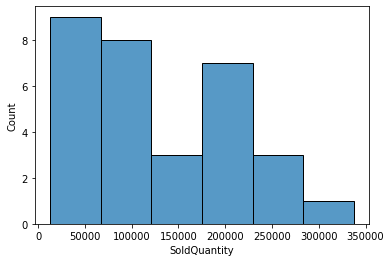

In [23]:
sns.histplot(df_inv_SQ.SoldQuantity)

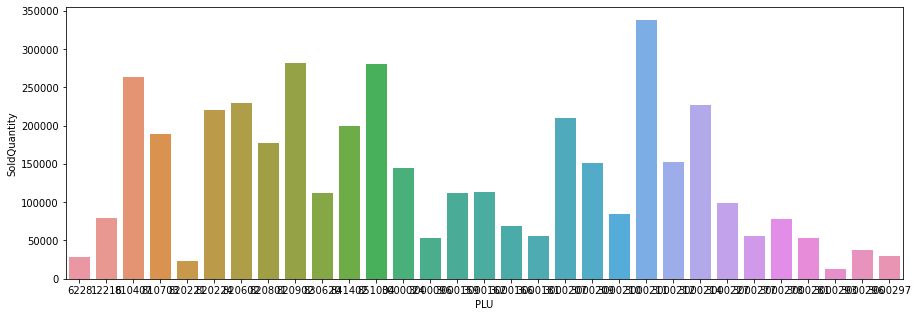

In [24]:
plt.figure(figsize=(15,5))
ax = sns.barplot(x="PLU", y="SoldQuantity", data=df_inv_SQ)

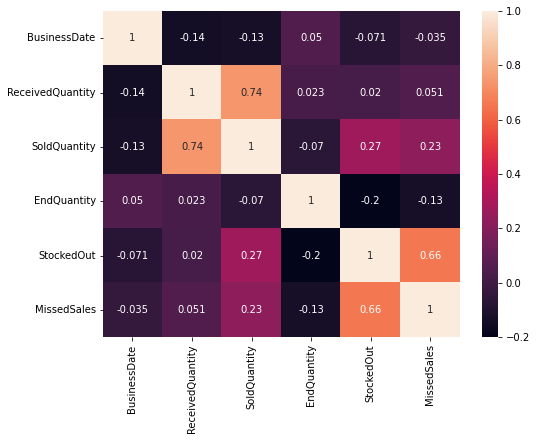

In [25]:
fig, ax = plt.subplots(figsize=(8,6))

df_temp = df_dynamic[['BusinessDate','ReceivedQuantity', 'SoldQuantity',
       'EndQuantity', 'StockedOut', 'MissedSales']]

corrMatrix = df_temp.corr()
sns.heatmap(corrMatrix, annot=True)
plt.show()

In [26]:
# After the month of Feb-2020, the sales declined rapidly due to Covid-19
df_temp = pd.DataFrame(df_dynamic.groupby(['BusinessDate'])['SoldQuantity'].sum()).sort_values(by=['BusinessDate'],ascending=True).reset_index()

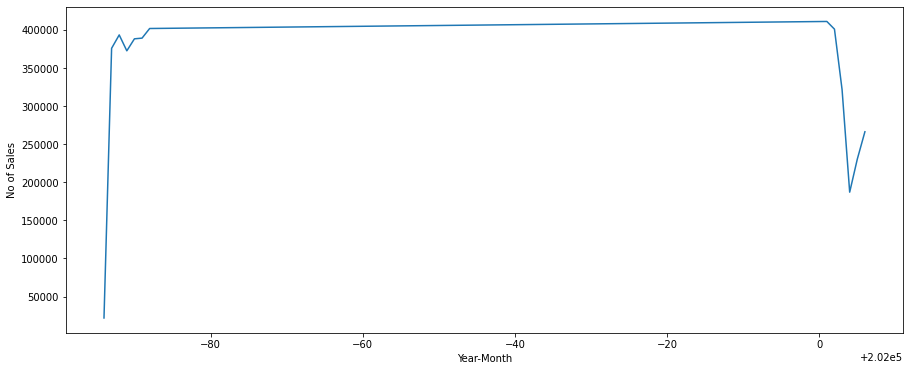

In [27]:
plt.figure(figsize=(15,6))
plt.xlabel("Year-Month")
plt.ylabel("No of Sales")
ax = plt.plot(df_temp['BusinessDate'],df_temp['SoldQuantity'],)

In [28]:
## April-2020 is the worst affected month in terms of Sales Quantity
df_temp = df_dynamic[df_dynamic['StoreID']==18]
df_temp = pd.DataFrame(df_temp.groupby(['BusinessDate','PLU'])['SoldQuantity'].sum()).sort_values(by=['BusinessDate'],ascending=True).reset_index()

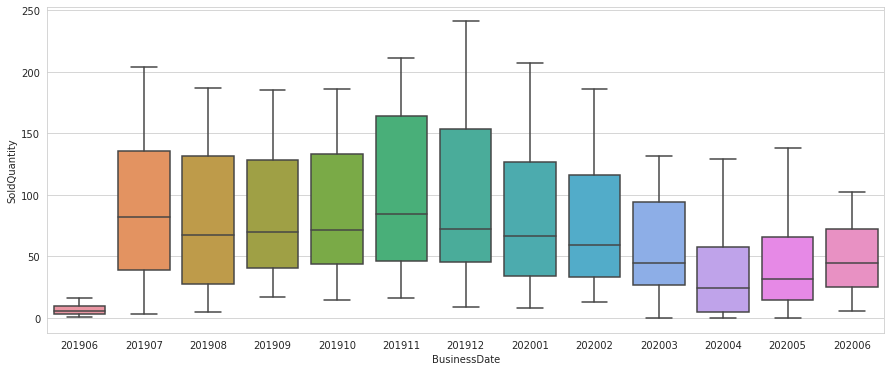

In [29]:
plt.figure(figsize=(15,6))
sns.set_style('whitegrid')
sns.boxplot(x='BusinessDate',y="SoldQuantity",data=df_temp)

In [30]:
df_temp = pd.DataFrame(df_dynamic.groupby(['BusinessDate','PLU'])['ReceivedQuantity'].sum()).sort_values(by=['BusinessDate'],ascending=True).reset_index()

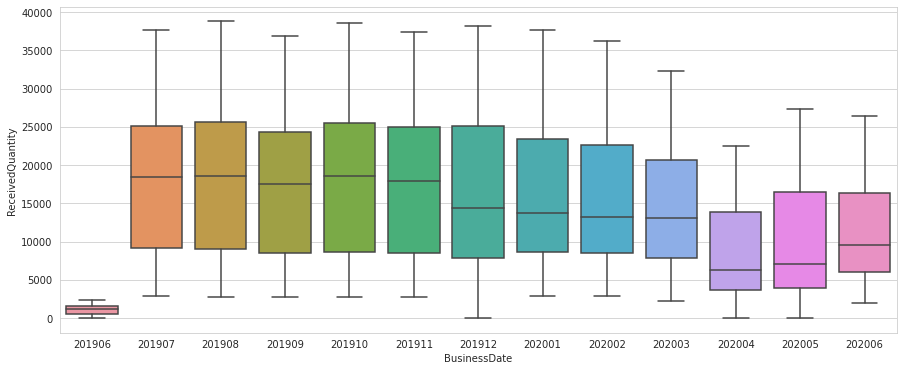

In [31]:
plt.figure(figsize=(15,6))
sns.set_style('whitegrid')
sns.boxplot(x='BusinessDate',y="ReceivedQuantity",data=df_temp)

In [32]:
df_temp = pd.DataFrame(df_dynamic.groupby(['BusinessDate','PLU'])['EndQuantity'].sum()).sort_values(by=['BusinessDate'],ascending=True).reset_index()

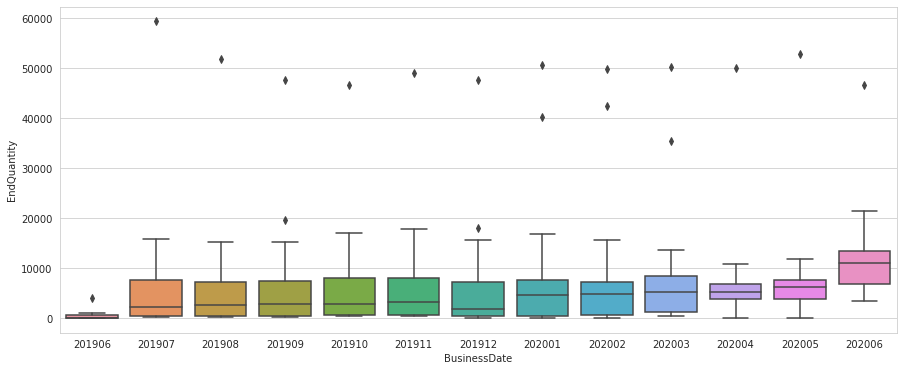

In [33]:
plt.figure(figsize=(15,6))
sns.set_style('whitegrid')
sns.boxplot(x='BusinessDate',y="EndQuantity",data=df_temp)

In [34]:
df_temp = pd.DataFrame(df_dynamic.groupby(['BusinessDate','PLU'])['StockedOut'].sum()).sort_values(by=['BusinessDate'],ascending=True).reset_index()

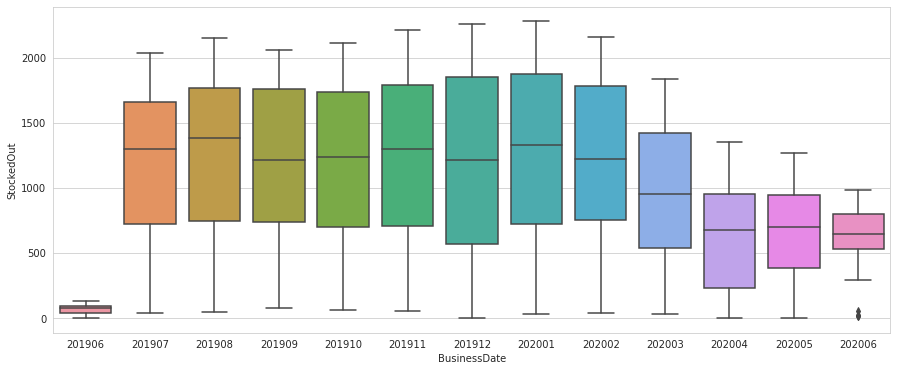

In [35]:
plt.figure(figsize=(15,6))
sns.set_style('whitegrid')
sns.boxplot(x='BusinessDate',y="StockedOut",data=df_temp)

In [36]:
df_store_18 = df_dynamic[df_dynamic['StoreID']==18]
df_store_18.head()
# df_store_ind = df_dynamic[((df_dynamic['StoreID']==18) | (df_dynamic['StoreID']==117) | (df_dynamic['StoreID']==332))]
# pd.DataFrame(df_store_ind.groupby(['StoreID','PLU'])[['ReceivedQuantity','SoldQuantity','EndQuantity']].sum()).reset_index().sort_values('SoldQuantity',ascending=False)
# df_dynamic[df_dynamic['StoreID']==117]
# df_dynamic[df_dynamic['StoreID']==332]

,StoreID,BusinessDate,PLU,ReceivedQuantity,SoldQuantity,EndQuantity,LatestOrder,StockedOut,MissedSales
39461,18,201906,3000227,4.0,1.0,4.0,9,0,0.00000
39462,18,201906,830620,2.0,1.0,0.0,7,1,2.56395
39463,18,201906,6228,6.0,0.0,8.0,0,0,0.00000
39464,18,201906,12216,0.0,0.0,3.0,0,0,0.00000
39465,18,201906,3000277,4.0,3.0,4.0,16,0,0.00000


Text(0, 0.5, '')

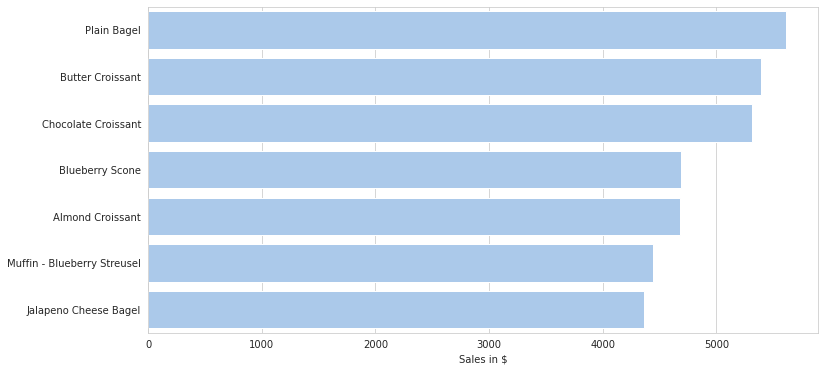

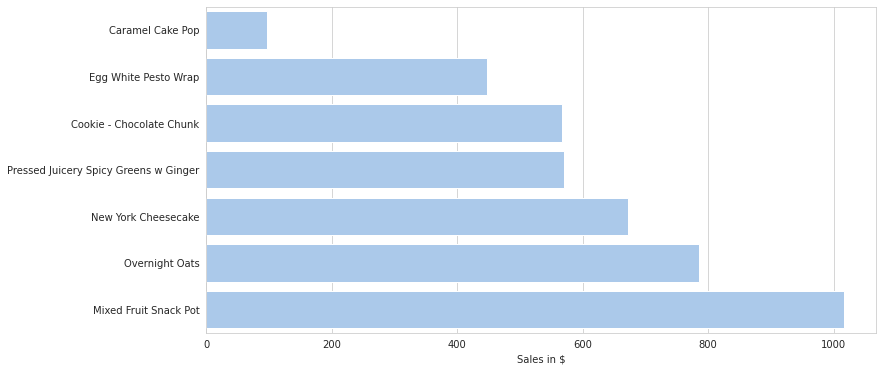

In [37]:
#Top 25% best seller products
# Most of the best selling items are Bake Case
df_temp_18 = pd.DataFrame(df_store_18.groupby(['PLU'])[['ReceivedQuantity','SoldQuantity','EndQuantity']].sum()).reset_index().sort_values('SoldQuantity',ascending=False)
# df_temp_18['Wastage'] = df_temp_18['ReceivedQuantity'] - (df_temp_18['SoldQuantity'] + df_temp_18['EndQuantity']) 
df_temp = df_temp_18.iloc[0:int(df_temp_18.shape[0]*0.25)]
df_temp = df_temp.merge(df_static,on=['PLU'],how='left')
df_temp['Sales in $'] = df_temp['SoldQuantity'].apply(lambda x:x*3)
df_temp[['PLU','Description','SoldQuantity','Sales in $','CategoryLvl1Desc','CategoryLvl2Desc','CategoryLvl3Desc']]

plt.figure(figsize=(12,6))
sns.set_color_codes("pastel")
sns.barplot(x="Sales in $", y="Description", data=df_temp,
            label="Total", color="b")
plt.ylabel("")

#Bottom 25% seller products
#Most of the least items are Cold Case
df_temp_18 = pd.DataFrame(df_store_18.groupby(['PLU'])[['ReceivedQuantity','SoldQuantity','EndQuantity']].sum()).reset_index().sort_values('SoldQuantity',ascending=False)
df_temp_18['Wastage'] = df_temp_18['ReceivedQuantity'] - (df_temp_18['SoldQuantity'] + df_temp_18['EndQuantity']) 
df_temp = df_temp_18.iloc[-int(df_temp_18.shape[0]*0.25):].sort_values('SoldQuantity',ascending=True)
df_temp = df_temp.merge(df_static,on=['PLU'],how='left')
df_temp['Sales in $'] = df_temp['SoldQuantity'].apply(lambda x:x*3)
df_temp[['PLU','Description','SoldQuantity','Sales in $','CategoryLvl1Desc','CategoryLvl2Desc','CategoryLvl3Desc']]

plt.figure(figsize=(12,6))
sns.set_color_codes("pastel")
sns.barplot(x="Sales in $", y="Description", data=df_temp,
            label="Total", color="b")
plt.ylabel("")



Text(0, 0.5, '')

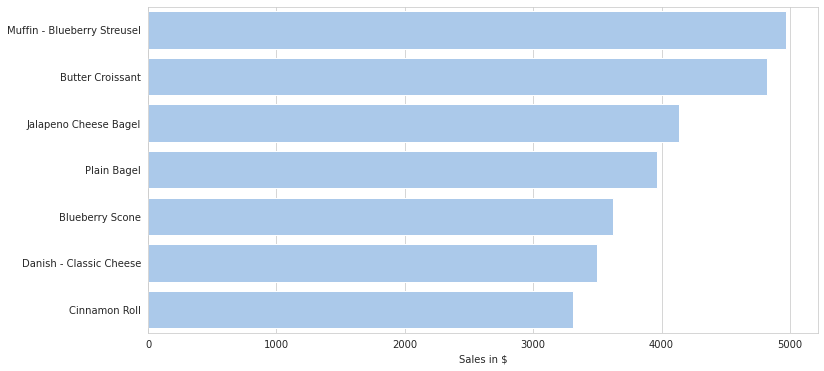

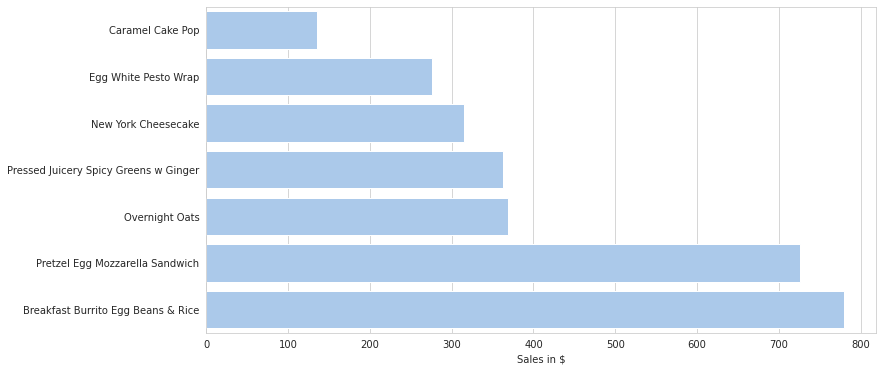

In [38]:
df_store_117 = df_dynamic[df_dynamic['StoreID']==117]
df_store_117.head()

#Top 25% best seller products
# Most of the best selling items are Bake Case
df_temp_117 = pd.DataFrame(df_store_117.groupby(['PLU'])[['ReceivedQuantity','SoldQuantity','EndQuantity']].sum()).reset_index().sort_values('SoldQuantity',ascending=False)
# df_temp_117['Wastage'] = df_temp_117['ReceivedQuantity'] - (df_temp_117['SoldQuantity'] + df_temp_117['EndQuantity']) 
df_temp = df_temp_117.iloc[0:int(df_temp_117.shape[0]*0.25)]
df_temp = df_temp.merge(df_static,on=['PLU'],how='left')
df_temp['Sales in $'] = df_temp['SoldQuantity'].apply(lambda x:x*3)
df_temp[['PLU','Description','SoldQuantity','Sales in $','CategoryLvl1Desc','CategoryLvl2Desc','CategoryLvl3Desc']]


plt.figure(figsize=(12,6))
sns.set_color_codes("pastel")
sns.barplot(x="Sales in $", y="Description", data=df_temp,
            label="Total", color="b")
plt.ylabel("")

#Bottom 25% seller products
#Most of the least selling items are Cold Case
df_temp_117 = pd.DataFrame(df_store_117.groupby(['PLU'])[['ReceivedQuantity','SoldQuantity','EndQuantity']].sum()).reset_index().sort_values('SoldQuantity',ascending=False)
# df_temp_117['Wastage'] = df_temp_117['ReceivedQuantity'] - (df_temp_117['SoldQuantity'] + df_temp_117['EndQuantity']) 
df_temp = df_temp_117.iloc[-int(df_temp_117.shape[0]*0.25):].sort_values('SoldQuantity',ascending=True)
df_temp = df_temp.merge(df_static,on=['PLU'],how='left')
df_temp['Sales in $'] = df_temp['SoldQuantity'].apply(lambda x:x*3)
df_temp[['PLU','Description','SoldQuantity','Sales in $','CategoryLvl1Desc','CategoryLvl2Desc','CategoryLvl3Desc']]

plt.figure(figsize=(12,6))
sns.set_color_codes("pastel")
sns.barplot(x="Sales in $", y="Description", data=df_temp,
            label="Total", color="b")
plt.ylabel("")

Text(0, 0.5, '')

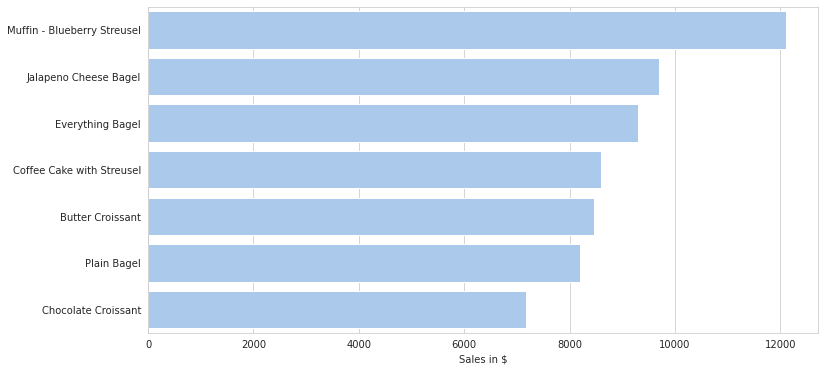

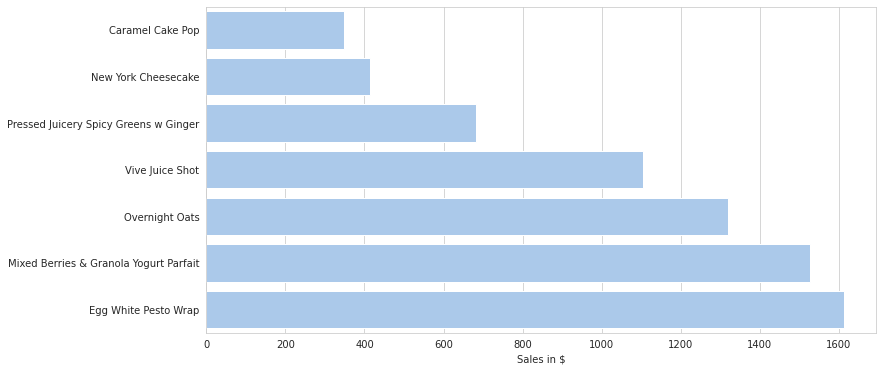

In [39]:
df_store_332 = df_dynamic[df_dynamic['StoreID']==332]
df_store_332.head()

#Top 25% best seller products
# Most of the best selling items are Bake Case
df_temp_332 = pd.DataFrame(df_store_332.groupby(['PLU'])[['ReceivedQuantity','SoldQuantity','EndQuantity']].sum()).reset_index().sort_values('SoldQuantity',ascending=False)
# df_temp_332['Wastage'] = df_temp_332['ReceivedQuantity'] - (df_temp_332['SoldQuantity'] + df_temp_332['EndQuantity']) 
df_temp = df_temp_332.iloc[0:int(df_temp_332.shape[0]*0.25)]
df_temp = df_temp.merge(df_static,on=['PLU'],how='left')
df_temp['Sales in $'] = df_temp['SoldQuantity'].apply(lambda x:x*3)
df_temp[['PLU','Description','SoldQuantity','Sales in $','CategoryLvl1Desc','CategoryLvl2Desc','CategoryLvl3Desc']]

plt.figure(figsize=(12,6))
sns.set_color_codes("pastel")
sns.barplot(x="Sales in $", y="Description", data=df_temp,
            label="Total", color="b")
plt.ylabel("")

#Bottom 25% seller products
#Most of the least selling items are Cold Case
df_temp_332 = pd.DataFrame(df_store_332.groupby(['PLU'])[['ReceivedQuantity','SoldQuantity','EndQuantity']].sum()).reset_index().sort_values('SoldQuantity',ascending=False)
# df_temp_332['Wastage'] = df_temp_332['ReceivedQuantity'] - (df_temp_332['SoldQuantity'] + df_temp_332['EndQuantity']) 
df_temp = df_temp_332.iloc[-int(df_temp_332.shape[0]*0.25):].sort_values('SoldQuantity',ascending=True)
df_temp = df_temp.merge(df_static,on=['PLU'],how='left')
df_temp['Sales in $'] = df_temp['SoldQuantity'].apply(lambda x:x*3)
df_temp[['PLU','Description','SoldQuantity','Sales in $','CategoryLvl1Desc','CategoryLvl2Desc','CategoryLvl3Desc']]

plt.figure(figsize=(12,6))
sns.set_color_codes("pastel")
sns.barplot(x="Sales in $", y="Description", data=df_temp,
            label="Total", color="b")
plt.ylabel("")



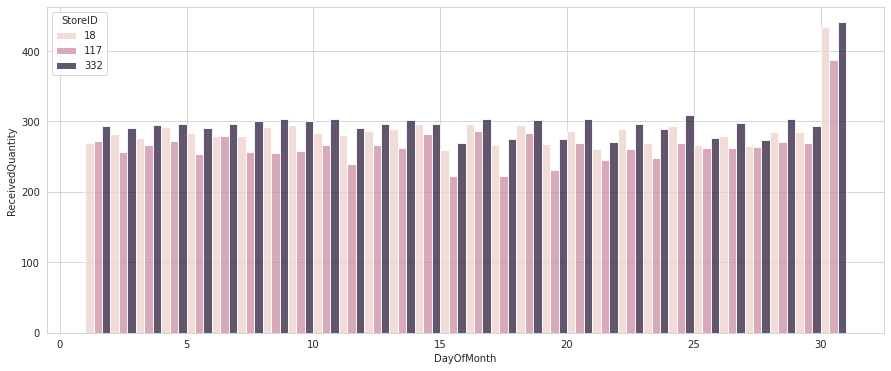

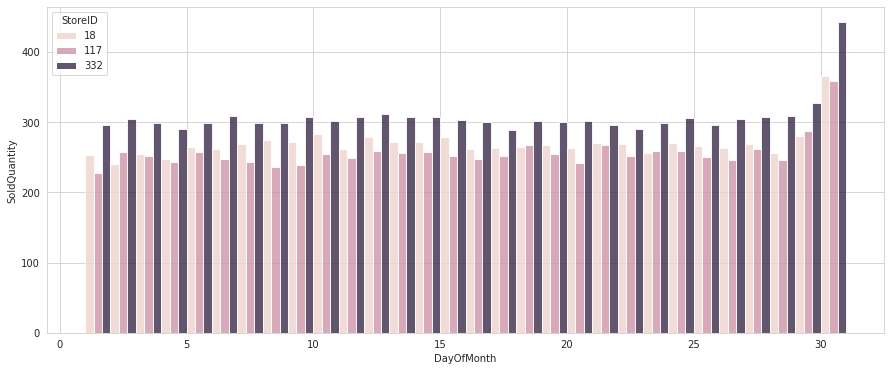

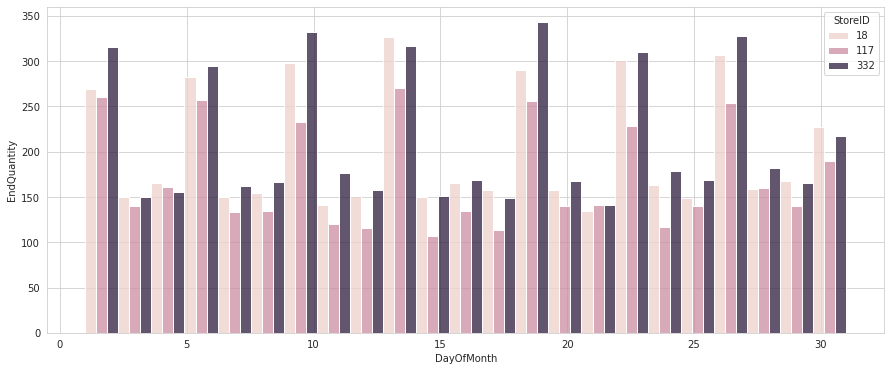

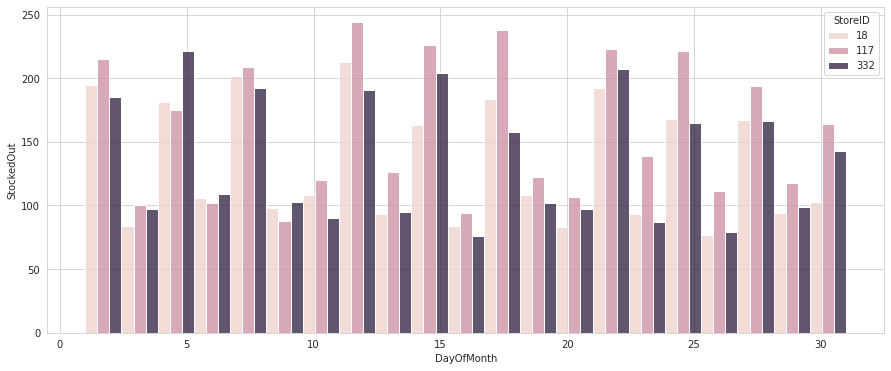

In [40]:
df_temp = df[(df['StoreID']==18) | (df['StoreID']==117) | (df['StoreID']==332)][['StoreID','BusinessDate','PLU','ReceivedQuantity','SoldQuantity','EndQuantity','StockedOut']].sort_values(['PLU','BusinessDate'])
df_temp

# df_temp['BusinessDate'].apply(lambda x:weekDay(int(x.split("-")[0]),int(x.split("-")[1]),int(x.split("-")[2])))
df_temp['DayOfMonth'] = df_temp['BusinessDate'].apply(lambda x:(pd.Timestamp(x)).day)
df_temp['DayOfWeek'] = df_temp['BusinessDate'].apply(lambda x:(pd.Timestamp(x)).day_of_week)
df_temp['Month'] = df_temp['BusinessDate'].apply(lambda x:(pd.Timestamp(x)).month)
df_temp['Year'] = df_temp['BusinessDate'].apply(lambda x:(pd.Timestamp(x)).year)

plt.figure(figsize=(15,6))
plt.ylabel('ReceivedQuantity')
sns.histplot(df_temp[df_temp['ReceivedQuantity']>0][['StoreID','ReceivedQuantity','DayOfMonth']].sort_values('DayOfMonth'),x='DayOfMonth',hue='StoreID', multiple="dodge")

plt.figure(figsize=(15,6))
plt.ylabel('SoldQuantity')
sns.histplot(df_temp[df_temp['SoldQuantity']>0][['StoreID','SoldQuantity','DayOfMonth']].sort_values('DayOfMonth'),x='DayOfMonth',hue='StoreID', multiple="dodge")

plt.figure(figsize=(15,6))
plt.ylabel('EndQuantity')
sns.histplot(df_temp[df_temp['EndQuantity']>0][['StoreID','EndQuantity','DayOfMonth']].sort_values('DayOfMonth'),x='DayOfMonth',hue='StoreID', multiple="dodge")

plt.figure(figsize=(15,6))
plt.ylabel('StockedOut')
sns.histplot(df_temp[df_temp['StockedOut']==1][['StoreID','StockedOut','DayOfMonth']].sort_values('DayOfMonth'),x='DayOfMonth',hue='StoreID', multiple="dodge")

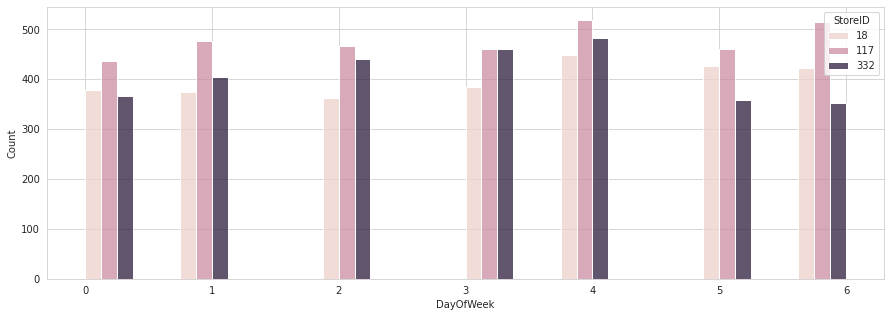

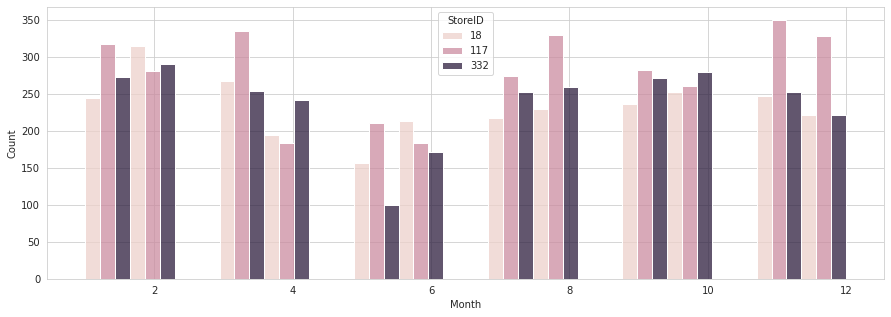

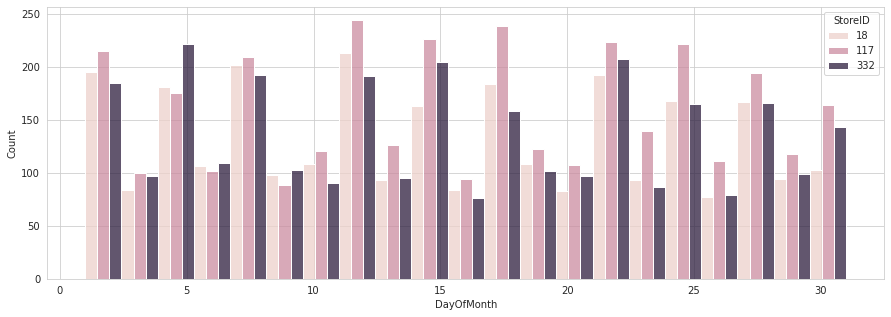

In [41]:
df_temp = df[(df['StoreID']==18) | (df['StoreID']==117) | (df['StoreID']==332) ][['StoreID','BusinessDate','PLU','ReceivedQuantity','SoldQuantity','EndQuantity','StockedOut']].sort_values(['PLU','BusinessDate'])

# df_temp['BusinessDate'].apply(lambda x:weekDay(int(x.split("-")[0]),int(x.split("-")[1]),int(x.split("-")[2])))
df_temp['DayOfMonth'] = df_temp['BusinessDate'].apply(lambda x:(pd.Timestamp(x)).day)
df_temp['DayOfWeek'] = df_temp['BusinessDate'].apply(lambda x:(pd.Timestamp(x)).day_of_week)
df_temp['Month'] = df_temp['BusinessDate'].apply(lambda x:(pd.Timestamp(x)).month)
df_temp['Year'] = df_temp['BusinessDate'].apply(lambda x:(pd.Timestamp(x)).year)

# Stockout trend at Day of Week level
plt.figure(figsize=(15,5))
sns.histplot(df_temp[df_temp['StockedOut']==1][['StoreID','StockedOut','DayOfWeek']].sort_values('DayOfWeek'),x='DayOfWeek',hue='StoreID', multiple="dodge")

# Stockout trend at Month Level
plt.figure(figsize=(15,5))
sns.histplot(df_temp[df_temp['StockedOut']==1][['StoreID','StockedOut','Month']].sort_values('Month'),x='Month',hue='StoreID',multiple="dodge")

# Stockout trend at Day of Month level
plt.figure(figsize=(15,5))
sns.histplot(df_temp[df_temp['StockedOut']==1][['StoreID','StockedOut','DayOfMonth']].sort_values('DayOfMonth'),x='DayOfMonth',hue='StoreID', multiple="dodge")

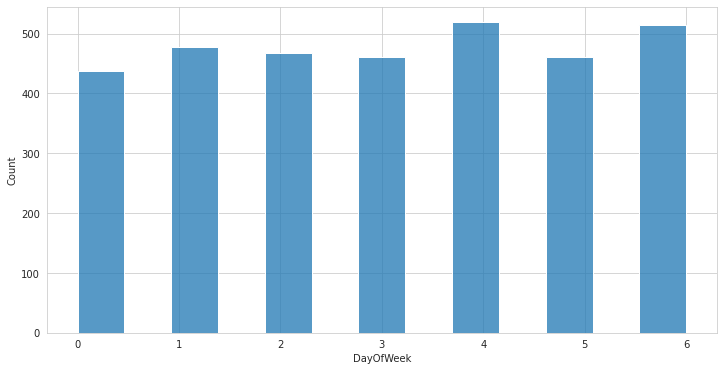

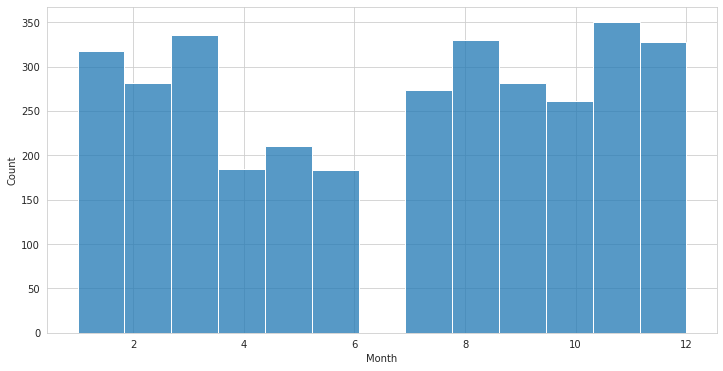

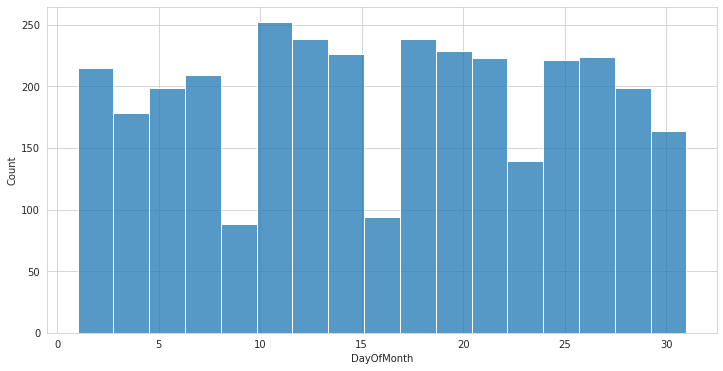

In [42]:
df_temp = df[df['StoreID']==117][['BusinessDate','PLU','ReceivedQuantity','SoldQuantity','EndQuantity','StockedOut']].sort_values(['PLU','BusinessDate'])

# df_temp['BusinessDate'].apply(lambda x:weekDay(int(x.split("-")[0]),int(x.split("-")[1]),int(x.split("-")[2])))
df_temp['DayOfMonth'] = df_temp['BusinessDate'].apply(lambda x:(pd.Timestamp(x)).day)
df_temp['DayOfWeek'] = df_temp['BusinessDate'].apply(lambda x:(pd.Timestamp(x)).day_of_week)
df_temp['Month'] = df_temp['BusinessDate'].apply(lambda x:(pd.Timestamp(x)).month)
df_temp['Year'] = df_temp['BusinessDate'].apply(lambda x:(pd.Timestamp(x)).year)

# Stockout trend at Day of Week level for StoreID 117
plt.figure(figsize=(12,6))
sns.histplot(df_temp[df_temp['StockedOut']==1][['StockedOut','DayOfWeek']].sort_values('DayOfWeek'),x='DayOfWeek',)

# Stockout trend at Month Level StoreID 117
plt.figure(figsize=(12,6))
sns.histplot(df_temp[df_temp['StockedOut']==1][['StockedOut','Month']].sort_values('Month'),x='Month',)

# Stockout trend at Day of Month level StoreID 117
plt.figure(figsize=(12,6))
sns.histplot(df_temp[df_temp['StockedOut']==1][['StockedOut','DayOfMonth']].sort_values('DayOfMonth'),x='DayOfMonth',)

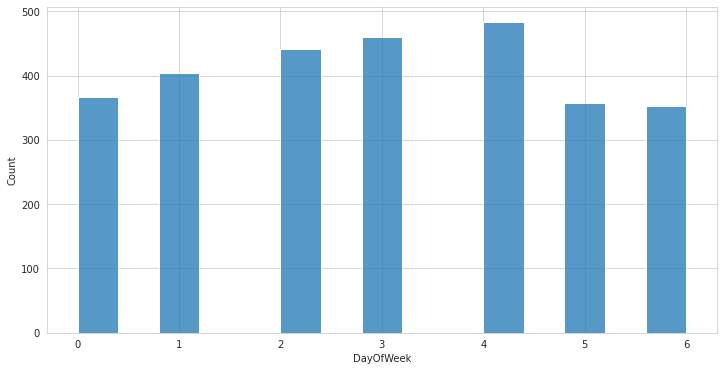

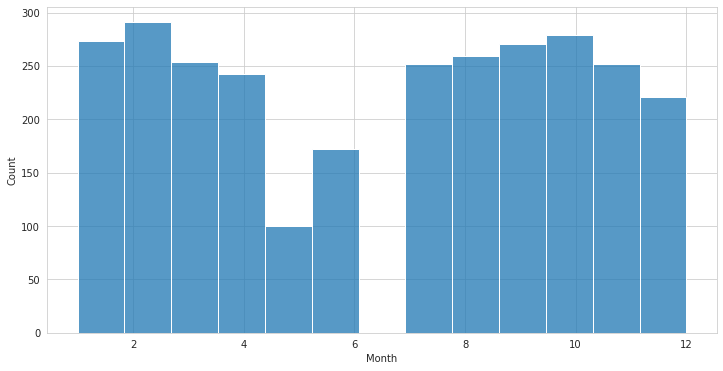

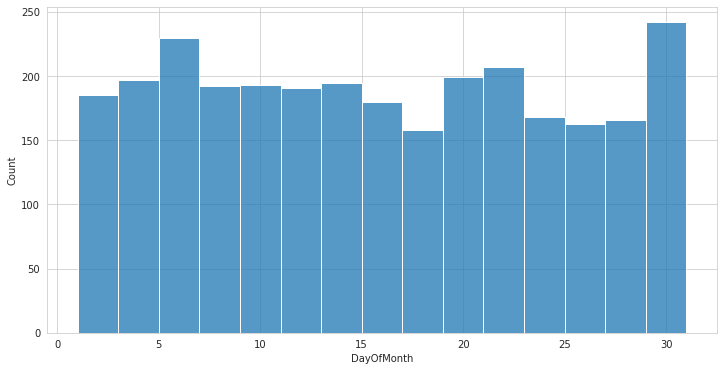

In [43]:
df_temp = df[df['StoreID']==332][['BusinessDate','PLU','ReceivedQuantity','SoldQuantity','EndQuantity','StockedOut']].sort_values(['PLU','BusinessDate'])

# df_temp['BusinessDate'].apply(lambda x:weekDay(int(x.split("-")[0]),int(x.split("-")[1]),int(x.split("-")[2])))
df_temp['DayOfMonth'] = df_temp['BusinessDate'].apply(lambda x:(pd.Timestamp(x)).day)
df_temp['DayOfWeek'] = df_temp['BusinessDate'].apply(lambda x:(pd.Timestamp(x)).day_of_week)
df_temp['Month'] = df_temp['BusinessDate'].apply(lambda x:(pd.Timestamp(x)).month)
df_temp['Year'] = df_temp['BusinessDate'].apply(lambda x:(pd.Timestamp(x)).year)

# Stockout trend at Day of Week level for StoreID 332
plt.figure(figsize=(12,6))
sns.histplot(df_temp[df_temp['StockedOut']==1][['StockedOut','DayOfWeek']].sort_values('DayOfWeek'),x='DayOfWeek',)

# Stockout trend at Month Level StoreID 332
plt.figure(figsize=(12,6))
sns.histplot(df_temp[df_temp['StockedOut']==1][['StockedOut','Month']].sort_values('Month'),x='Month',)

# Stockout trend at Day of Month level StoreID 332
plt.figure(figsize=(12,6))
sns.histplot(df_temp[df_temp['StockedOut']==1][['StockedOut','DayOfMonth']].sort_values('DayOfMonth'),x='DayOfMonth',)

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:670: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


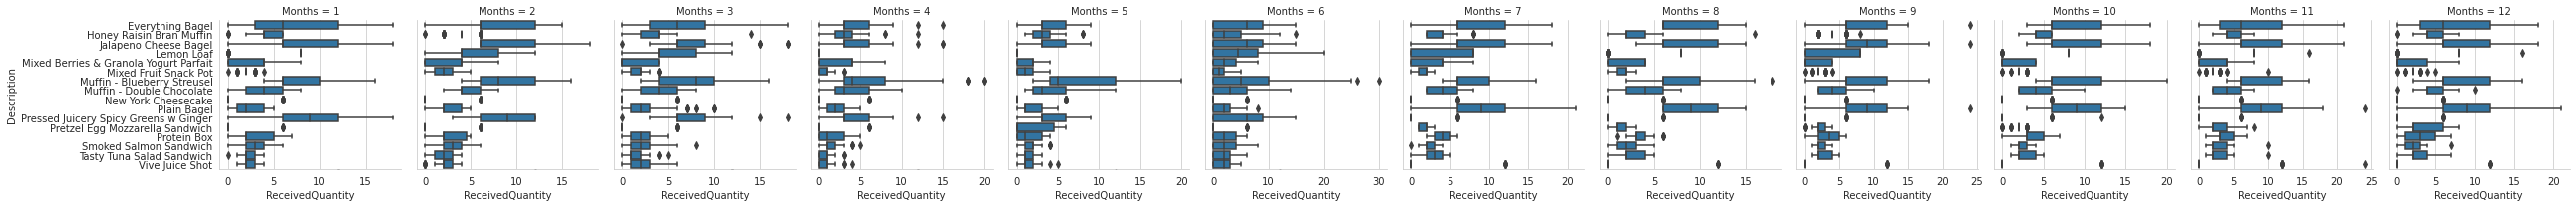

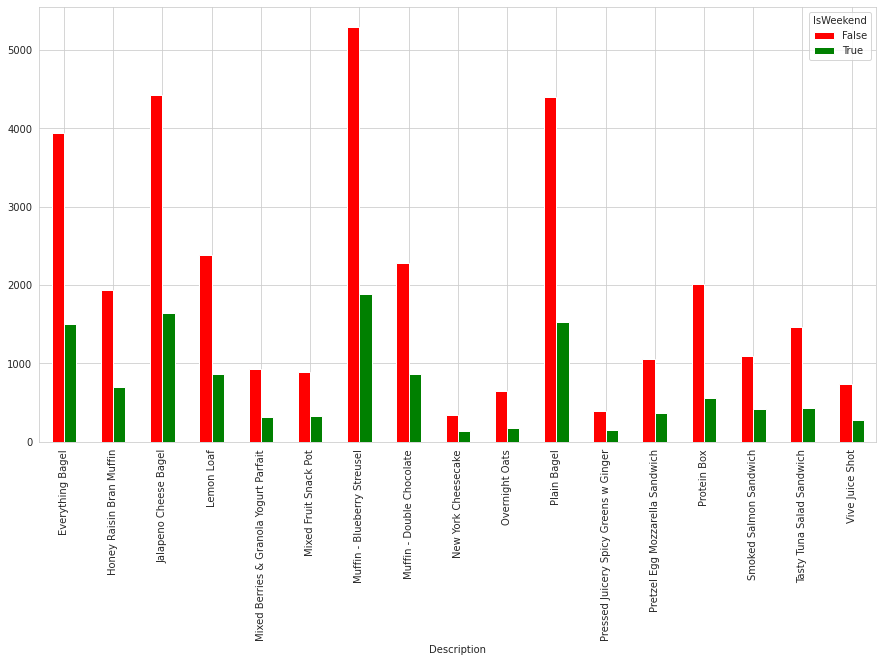

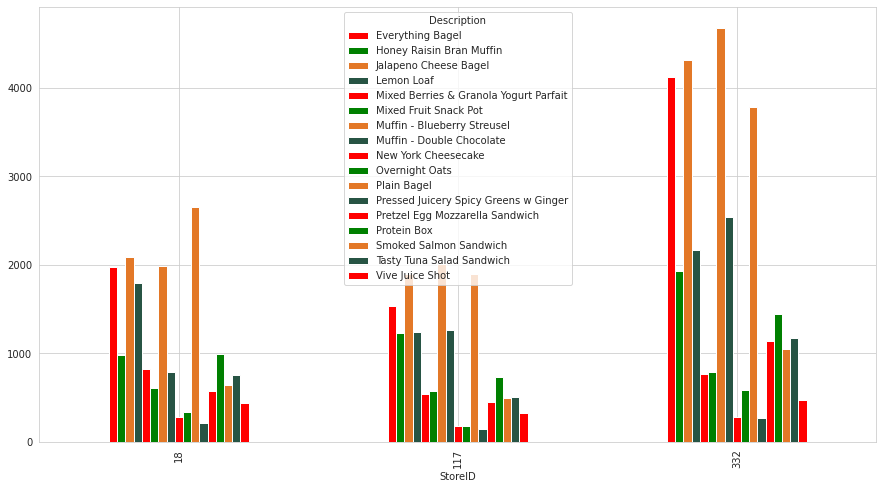

In [44]:
df_1 = df.drop(['CategoryLvl1Desc','CategoryLvl2Desc','CategoryLvl3Desc','ItemType'],axis=1)

df_1['Months'] = pd.DatetimeIndex(df_1['BusinessDate']).month
df_1['Year'] = pd.DatetimeIndex(df_1['BusinessDate']).year
df_1

fh_18 = df_1.loc[(df['StoreID'] ==18)]
fh_117 = df_1.loc[(df['StoreID'] ==117)]
fh_332 = df_1.loc[(df['StoreID'] ==332)]
# 3 Store data  :
df_a=pd.concat([fh_18,fh_117,fh_332])
df_a = df_a.sort_values(by=['Description'])

df_a = df_a[df_a['Description']>="Everything Bagel"]

g = sns.FacetGrid(df_a, col="Months", sharex=False)
g.map(sns.boxplot, 'ReceivedQuantity', 'Description')

df_a["BusinessDate"] = pd.to_datetime(df_a["BusinessDate"])
df_a["DayOfWeek"] = df_a["BusinessDate"].dt.weekday
df_a["IsWeekend"] = df_a["BusinessDate"].dt.weekday >= 5

df_b = df_a.pivot_table(index='Description', columns='IsWeekend', values='SoldQuantity',aggfunc='sum')
df_b.plot(kind='bar', figsize=(15, 8), color=['red', 'Green', '#e37827', '#275444'])

df_b = df_a.pivot_table(index='StoreID', columns='Description', values='ReceivedQuantity',aggfunc='sum')
df_b.plot(kind='bar', figsize=(15, 8), color=['red', 'Green', '#e37827', '#275444'])

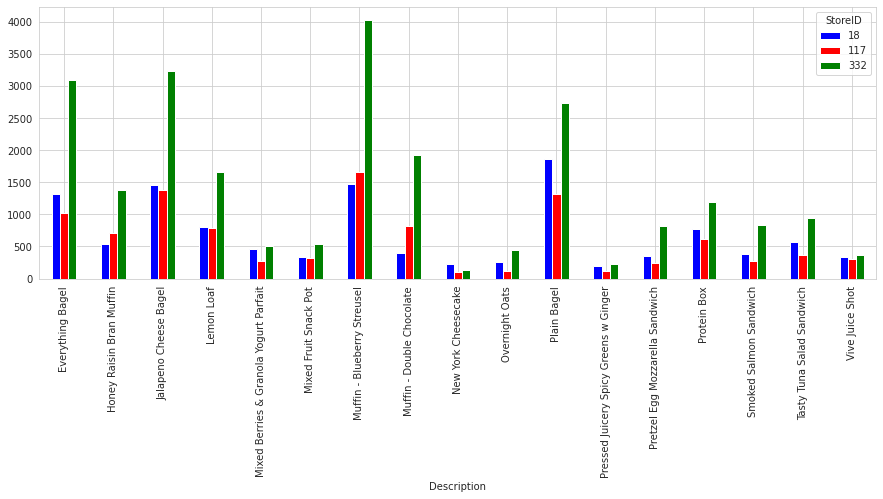

In [45]:
df_a_groupby=df_a.groupby(['Description','StoreID'])['SoldQuantity'].sum().reset_index(name='Total_Sales')
df_H = df_a_groupby.pivot(index='Description', columns='StoreID', values='Total_Sales')
df_H.plot(kind='bar', figsize=(15, 5), color=['blue', 'red', 'green'])